<a href="https://colab.research.google.com/github/brainmentorspvtltd/IGDTU_ImageProcessingTF/blob/main/IG_GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

os.environ["KAGGLE_USERNAME"] = "ravikanttyagi"
os.environ["KAGGLE_KEY"] = "095a21c789eb4728fde2b29230033273"

!kaggle datasets download jessicali9530/celeba-dataset

 99% 1.31G/1.33G [00:12<00:00, 147MB/s]
100% 1.33G/1.33G [00:12<00:00, 114MB/s]


In [3]:
# !unzip celeba-dataset.zip

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tqdm import tqdm
import cv2

In [2]:
ROOT_DIR = "img_align_celeba/img_align_celeba"
IMAGE_WIDTH = 128
IMAGE_HEIGHT = 128
TOTAL_IMAGES = 10000

In [3]:
images = os.listdir(ROOT_DIR)

In [4]:
len(images)

202599

In [5]:
images_list = []
for i in tqdm(range(TOTAL_IMAGES)):
  img = cv2.imread(ROOT_DIR + "/" + images[i])
  img = cv2.resize(img, (IMAGE_WIDTH, IMAGE_HEIGHT))
  img = img / 255.0 # normalize image
  images_list.append(img)

images_arr = np.array(images_list)

100%|██████████| 10000/10000 [00:27<00:00, 363.37it/s]


In [6]:
images_arr.shape

(10000, 128, 128, 3)

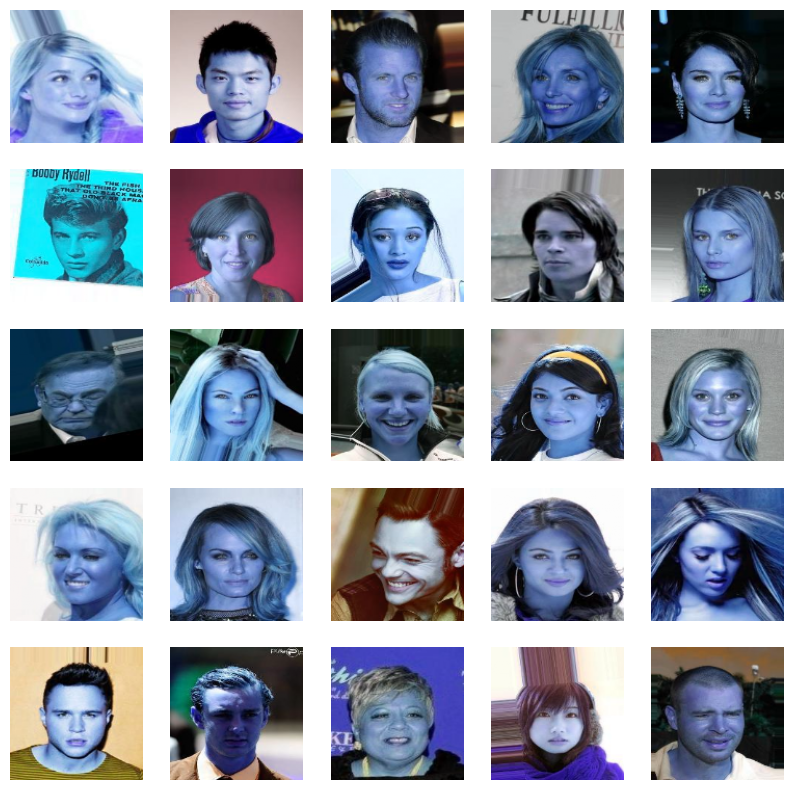

In [7]:
plt.figure(1, figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(images_arr[i])
  plt.axis("off")
plt.show()

In [10]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Conv2DTranspose
from tensorflow.keras.layers import LeakyReLU, Reshape, Dropout, Flatten
from tensorflow.keras.models import Model

In [9]:
NOISE_DIM = 100
CHANNELS = 3

In [16]:
def discriminator_model():
  inp = Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, CHANNELS))
  x = Conv2D(32, (3,3))(inp)
  x = LeakyReLU()(x)

  x = Conv2D(64, (3,3), strides = 2)(x)
  x = LeakyReLU()(x)

  x = Conv2D(128, (3,3), strides = 2)(x)
  x = LeakyReLU()(x)

  x = Conv2D(256, (3,3), strides = 2)(x)
  x = LeakyReLU()(x)

  x = Flatten()(x)
  x = Dropout(0.3)(x)

  oup = Dense(1, activation="sigmoid")(x)

  model = Model(inp, oup)
  return model

In [17]:
discriminator = discriminator_model()

In [18]:
discriminator.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d_8 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 126, 126, 32)      0         
                                                                 
 conv2d_9 (Conv2D)           (None, 62, 62, 64)        18496     
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 62, 62, 64)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 30, 30, 128)       73856     
                                                                 
 leaky_re_lu_10 (LeakyReLU)  (None, 30, 30, 128)       0   

In [131]:
def generator_model():
  gen_input = Input(shape=(NOISE_DIM, ))
  x = Dense(256 * 14* 14)(gen_input)
  x = LeakyReLU()(x)
  x = Reshape((14,14,256))(x)

  x = Conv2D(256, (3,3), padding="same")(x)
  x = LeakyReLU()(x)

  x = Conv2DTranspose(128, 4, strides = 2)(x)
  x = LeakyReLU()(x)

  x = Conv2DTranspose(64, 4, strides = 2)(x)
  x = LeakyReLU()(x)

  x = Conv2DTranspose(32, 4, strides = 2)(x)
  x = LeakyReLU()(x)

  x = Conv2DTranspose(32, 5, strides=1)(x)
  out = Conv2D(CHANNELS, 3)(x)

  model = Model(gen_input, out)
  return model

In [132]:
generator = generator_model()

In [133]:
generator.summary()

Model: "model_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_41 (InputLayer)       [(None, 100)]             0         
                                                                 
 dense_40 (Dense)            (None, 50176)             5067776   
                                                                 
 leaky_re_lu_197 (LeakyReLU)  (None, 50176)            0         
                                                                 
 reshape_37 (Reshape)        (None, 14, 14, 256)       0         
                                                                 
 conv2d_84 (Conv2D)          (None, 14, 14, 256)       590080    
                                                                 
 leaky_re_lu_198 (LeakyReLU)  (None, 14, 14, 256)      0         
                                                                 
 conv2d_transpose_130 (Conv2  (None, 30, 30, 128)      524

In [144]:
noise = tf.random.normal([1,100])

In [145]:
fake_img = generator(noise)

In [146]:
# fake_img[0]

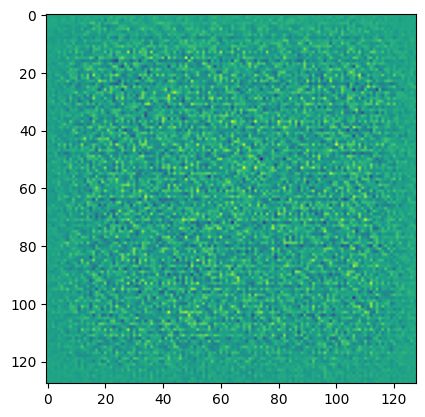

In [148]:
plt.imshow(fake_img[0,:,:,0])
plt.show()